
**Python Blok Projesi**<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

<p>Nobel Ödülü belki de dünyanın en tanınmış bilimsel ödülüdür. Her yıl kimya, edebiyat, fizik, tıp, ekonomi ve barış alanlarında bilim insanlarına ve akademisyenlere verilmektedir. Bu projede, Nobel Ödülü kazananları inceleyeceğiz. </p>

## Proje Soruları

1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.
2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.
3. Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.
4. Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?
5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.
6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.
7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)
8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.


In [1]:
#Kullanacağımız kütüphaneleri Yüklüyoruz.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 'Nobel.csv'den nobel dataframe oluşturuyoruz.
nobel = pd.read_csv ('nobel.csv')

In [3]:
#datamızı tanıyoruz.
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [4]:
#İlk sütunlara bakıyoruz.
nobel.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
#toplam boş(nan) değerleri buluyoruz.
nobel.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [6]:
#'birth_date' type objecten datetime çeviyoruz.
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], format='%Y-%m-%d')

In [7]:
#'birth_date' boş sütunlara bakıyorum.
nobel.loc[(nobel['birth_date'].isnull())]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#unique değerlere bakıyorum
nobel.nunique()

year                    113
category                  6
prize                   579
motivation              565
prize_share               4
laureate_id             904
laureate_type             2
full_name               904
birth_date              868
birth_city              601
birth_country           121
sex                       2
organization_name       295
organization_city       181
organization_country     29
death_date              582
death_city              291
death_country            50
dtype: int64

In [9]:
# Eksik doğum tarihi olan KİŞİleri buluyorum.
nobel.loc[(nobel['birth_date'].isnull()) & (nobel['laureate_type'] == 'Individual')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
816,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,841,Individual,Venkatraman Ramakrishnan,NaT,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaT,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN


In [10]:
# Eksik doğum tarihlerini internetten bulup ekliyorum.
individiual_empty_birth_dates = ['1952-04-01','1959-09-22']
nobel.loc[(nobel['birth_date'].isnull()) & (nobel['laureate_type'] == 'Individual'), 'birth_date'] = individiual_empty_birth_dates

In [11]:
# Doğum tarihinde kalan eksikler kişilere ait değil şirketlere ait hangileri olduğunu buluyorum.
nobel.loc[(nobel['birth_date'].isnull()) & (nobel['laureate_type'] == 'Organization')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Şirketlerinde tarihlerini internetten bulup dataya ekliyorum.
organization_empty_birth_dates =  ["1873-09-08","1891-05-22","1863-02-17","1931-04-01","1917-12-10","1917-12-10",
                                     "1950-12-14","1919-07-15","1946-12-11","1919-04-11","1961-07-28","1980-12-10",
                                     "1948-05-29","1919-07-15","1957-07-07","1992-10-03","1971-12-20","1945-10-24",
                                     "1957-07-29","1983-10-02","1988-11-20","1993-11-01","1997-04-29","1948-05-29",
                                     "1957-07-07","1992-10-03"]
nobel.loc[(nobel['birth_date'].isnull()) & (nobel['laureate_type'] == 'Organization'),'birth_date'] = organization_empty_birth_dates

In [13]:
# Cinsiyeti boş olanlara bakıyorum
nobel.loc[nobel['sex'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,1931-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1917-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),1950-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,1919-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1946-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,1919-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Boş cinsiyet değerlerini other olarak dolduruyorum.
nobel.loc[nobel['sex'].isnull(),'sex'] = 'Other'

In [15]:
# 'birth_country' boş sütunları buluyorum
nobel.loc[nobel['birth_country'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,1931-04-01,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1917-12-10,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),1950-12-14,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,1919-07-15,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1946-12-11,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,1919-04-11,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 'birth_country' boş değerleri internetten bulup tamamlıyorum.
empty_birth_country = ["Belgium","Switzerland","Switzerland","Switzerland","Switzerland","United Kingdom","United States",
                       "Switzerland","Switzerland","France","United States","Switzerland","Switzerland","Switzerland",
                       "United Kingdom","Switzerland","Austria","Bangladesh","Switzerland","Belgium","Switzerland",
                       "Belgium","Switzerland","Belgium","Netherlands","Tunisia"]
nobel.loc[nobel['birth_country'].isnull(),'birth_country'] = empty_birth_country

In [17]:
# 'birth_city' boş değerleri buluyorum
nobel.loc[nobel['birth_city'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,Belgium,Other,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,1931-04-01,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1917-12-10,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,United Kingdom,Other,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),1950-12-14,NaN,United States,Other,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,1919-07-15,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1946-12-11,NaN,Switzerland,Other,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,1919-04-11,NaN,France,Other,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# 'birth_city' boş değerleri internetten bulup dolduruyorum
empty_birth_city = ["Gent","Bern","Geneva","Geneva","Geneva","London","Philadelphia","Geneva","Geneva","Paris",
                    "New York City","Geneva","Geneva","Geneva","London","Geneva","Vienna","Dhaka","Geneva","Chaguanas",
                    "Brussels","Geneva","Brussels","Geneva","Çangçun","Brussels","The Hague","Tunis"]
nobel.loc[nobel['birth_city'].isnull(),'birth_city'] = empty_birth_city

In [19]:
nobel.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date                0
birth_city                0
birth_country             0
sex                       0
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

Veri manipülasyonunu bitirdik.Proje Sorularımıza geçelim

## PROJE SORULARI

## 1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.

In [20]:
# Veriyi gruplandırıp toplam ödül sayısına büyükten küçüğe göre sıralandıralım
grouped_data = nobel.groupby('birth_country').size()
sorted_data = grouped_data.sort_values(ascending=False)
# En çok nobel alan 10 ülkeyi alalım
most_awarded_countries = sorted_data.head(10)
# Sonucu yazdıralım
print(most_awarded_countries)

birth_country
United States of America    259
United Kingdom               87
Germany                      61
France                       52
Sweden                       29
Switzerland                  29
Japan                        24
Netherlands                  19
Canada                       18
Russia                       17
dtype: int64


## 2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.

In [21]:
# Cinsiyeti kadın olanları belirleyip yıla göre sıralayalım ve ilk 10 kişiyi alalım
first_winner_women = nobel[nobel['sex'] == 'Female'].sort_values('year')[0:10]
# ilk 10 kişinin datada sadece yıl,isim,kategori, ülkelerini alalım ve indekslerini sıfırdan itibaren yazalım.  
first_winner_women = first_winner_women[['year','full_name','category','birth_country']].reset_index(drop=True)
first_winner_women

,year,full_name,category,birth_country
0,1903,"Marie Curie, née Sklodowska",Physics,Russian Empire (Poland)
1,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,Austrian Empire (Czech Republic)
2,1909,Selma Ottilia Lovisa Lagerlöf,Literature,Sweden
3,1911,"Marie Curie, née Sklodowska",Chemistry,Russian Empire (Poland)
4,1926,Grazia Deledda,Literature,Italy
5,1928,Sigrid Undset,Literature,Denmark
6,1931,Jane Addams,Peace,United States of America
7,1935,Irène Joliot-Curie,Chemistry,France
8,1938,Pearl Buck,Literature,United States of America
9,1945,Gabriela Mistral,Literature,Chile


## 3. Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.

In [22]:
# Cinsiyeti erkek olanları belirleyip yıla göre sıralayalım ve ilk 10 kişiyi alalım
first_winner_men = nobel[nobel['sex'] == 'Male'].sort_values('year')[0:10]
# ilk 10 kişinin datada sadece yıl,isim,kategori, ülkelerini alalım ve indekslerini sıfırdan itibaren yazalım 
first_winner_men = first_winner_men[['year','full_name','category','birth_country']].reset_index(drop=True)
first_winner_men

,year,full_name,category,birth_country
0,1901,Jacobus Henricus van 't Hoff,Chemistry,Netherlands
1,1901,Sully Prudhomme,Literature,France
2,1901,Emil Adolf von Behring,Medicine,Prussia (Poland)
3,1901,Jean Henry Dunant,Peace,Switzerland
4,1901,Frédéric Passy,Peace,France
5,1901,Wilhelm Conrad Röntgen,Physics,Prussia (Germany)
6,1902,Hendrik Antoon Lorentz,Physics,Netherlands
7,1902,Charles Albert Gobat,Peace,Switzerland
8,1902,Élie Ducommun,Peace,Switzerland
9,1902,Pieter Zeeman,Physics,Netherlands


## 4. Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?

In [23]:
## Yıl ve ülke bazında ödül sayılarını hesaplayın
country_year_counts = nobel.groupby(['year', 'birth_country']).size().unstack(fill_value=0)
# Yıllar boyunca en çok ödül kazanan ülkeyi belirlemek
top_country_per_year = country_year_counts.idxmax(axis=1)
top_country_awards_per_year = country_year_counts.max(axis=1)

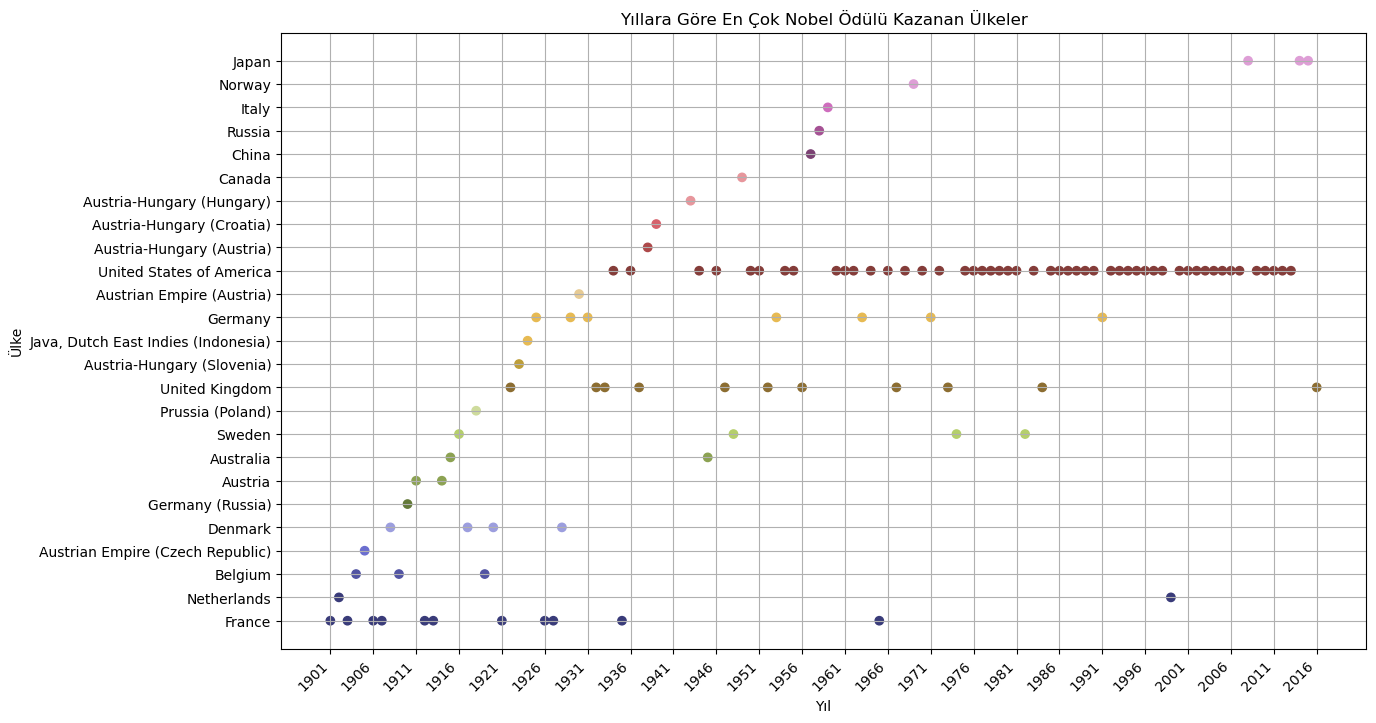

In [24]:
# Grafik için yıllar ve ülkeler listesini alalım
years = top_country_per_year.index
countries = top_country_per_year.values

# Benzersiz ülkeleri almak için
unique_countries = top_country_per_year.unique()

# Her ülke için renk ataması yapmak
color_map = {country: idx for idx, country in enumerate(unique_countries)}

# Renkleri belirlemek
colors = [color_map[country] for country in countries]

# Grafik oluşturma
plt.figure(figsize=(14, 8))
scatter = plt.scatter(years, countries, c=colors, cmap='tab20b')

# Grafiği etiketleyin ve gösterin
plt.title('Yıllara Göre En Çok Nobel Ödülü Kazanan Ülkeler')
plt.xlabel('Yıl')
plt.ylabel('Ülke')
plt.grid(True)
plt.xticks(np.arange(min(years), max(years)+1, 5), rotation=45, ha='right')

plt.show()

## Yorum 
Yıllara göre en çok Nobel ödülü alan ülke Amerika olduğunu ve hakimiyetini grafikte gördük 1934 de başlıyor ardından 1936 ve 2.dünya savaşından sonra hızlanıyorlar 1950-51 de üst üste hakim oluyorlar ve sonrasında liderliği nadir kaybediyorlar. Sebebi birden fazla olabilir.
Amerika hakimiyeti 1934 de başlamış sonrasında devam etmiş liderliği çok az kaptırmıştır.
- İkinci Dünya Savaşı Avrupa topraklarında gerçekleşmiş Amerika bir taraf ama Amerikanın topraklarında savaş olmamıştır ve galip tarafta olduğundan ağır tazminat ödememiştir.(Savaşın ABD topraklarında gerçekleşmemesi ve ekonomik olarak güçlü çıkması.)
- İkinci Dünya Savaşı'ndan sonra Avrupa'dan beyin göçü alması.
- Bilim insanlarına sağladığı fırsatlar ve kaynaklar.
- Araştırma ve geliştirme için yapılan yüksek yatırımlar.
Bu sebeplerden dolayı Bilim İnsanları ABD'yi tercih etmiştir.



## 5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.

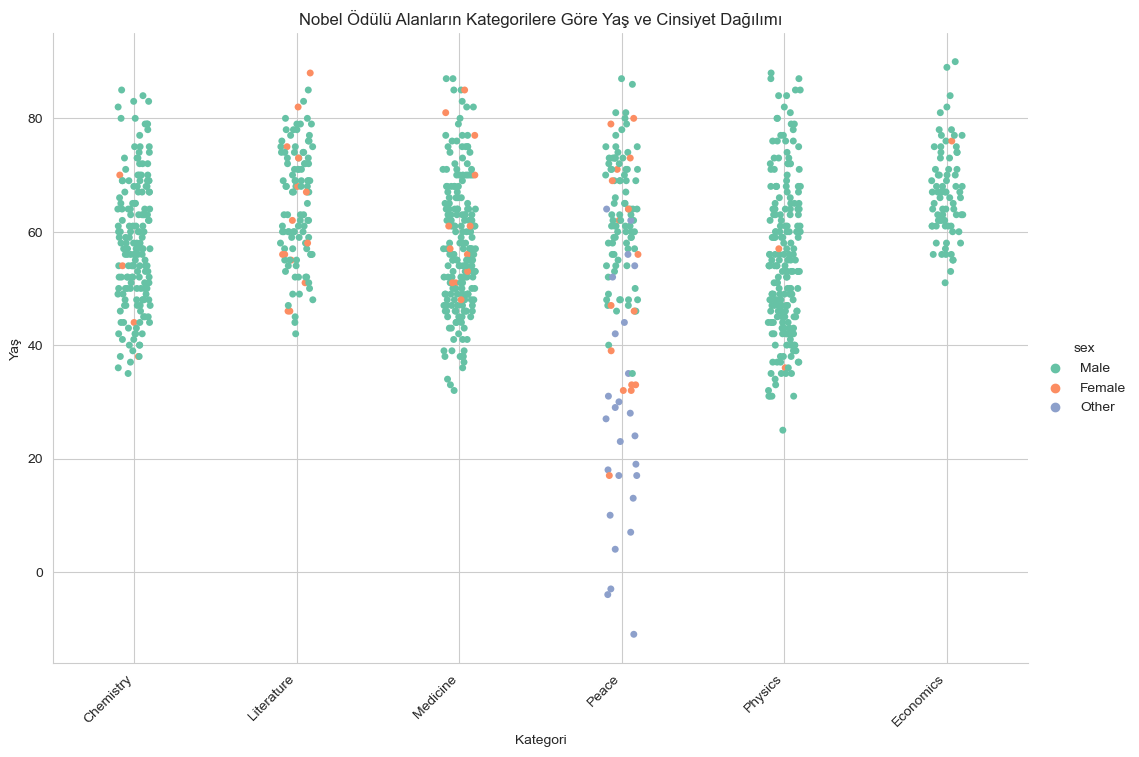

In [25]:
# Grafikte uyarıları kapatmak için
import warnings
warnings.filterwarnings("ignore")
# Yaş hesaplamak için yıldan doğum gününü çıkartıyoruz
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year
# Seaborn stil ayarları
sns.set_style("whitegrid")  # Grid stili
sns.set_palette("Set2")     # Renk paleti
# Tüm kategorileri tek bir grafikte göstermek için
sns.catplot(data=nobel, x = "category", y = "age",hue="sex",height=7, aspect=1.5)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Kategori')
plt.ylabel('Yaş')
plt.title('Nobel Ödülü Alanların Kategorilere Göre Yaş ve Cinsiyet Dağılımı')
plt.grid(True)
plt.show()


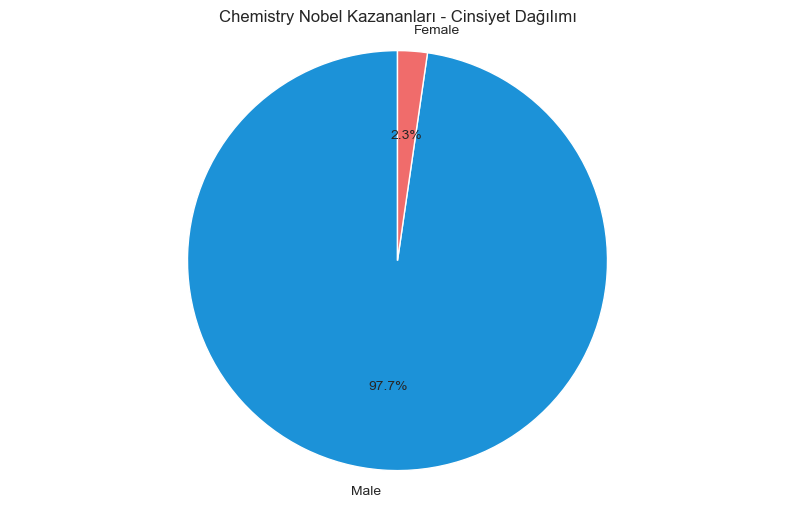

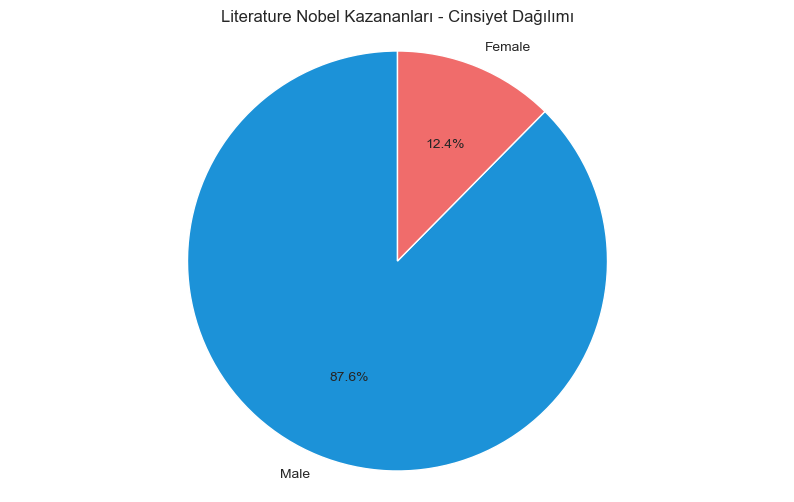

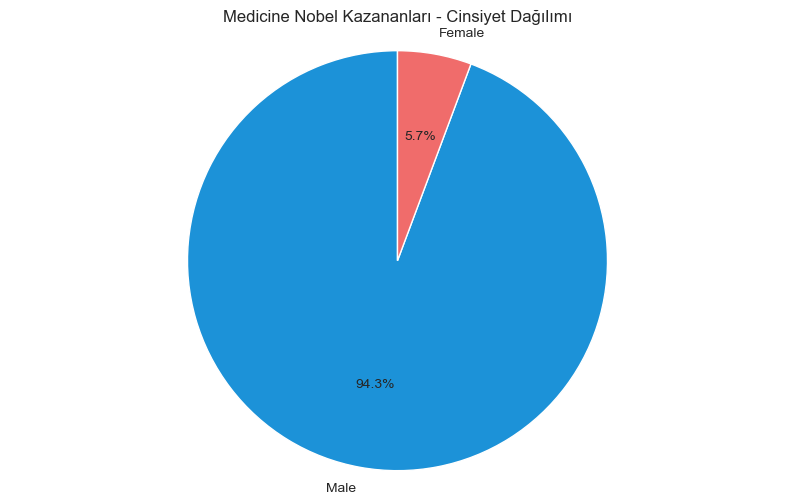

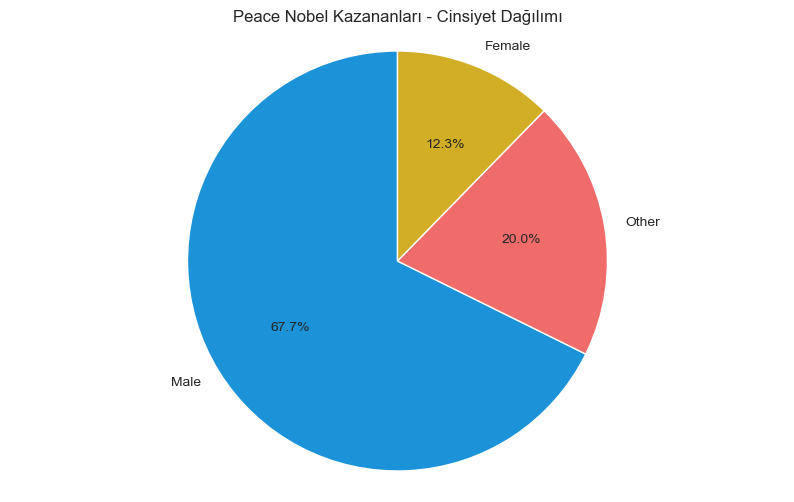

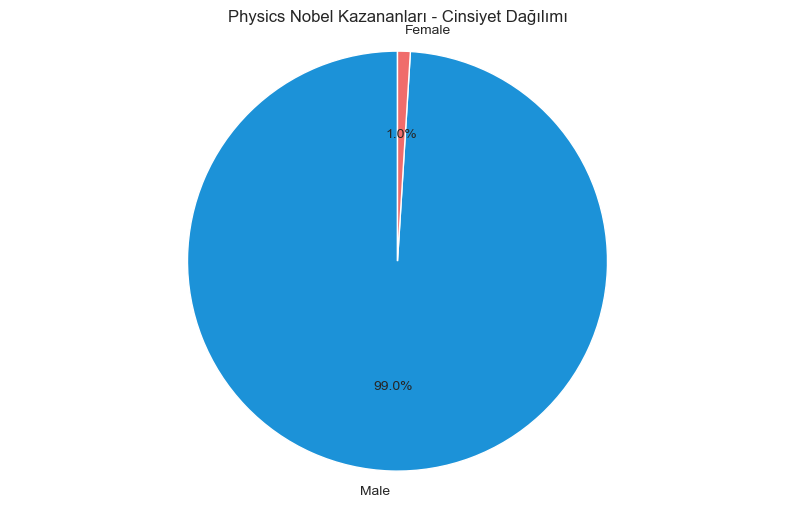

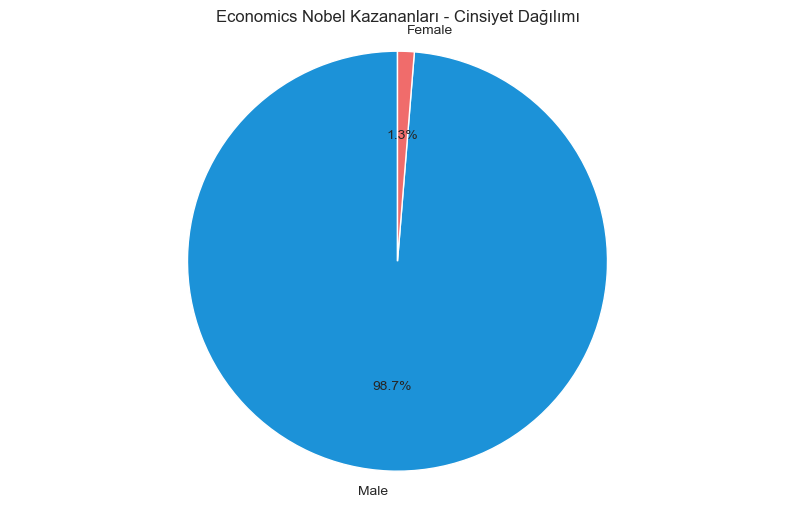

In [26]:
# Benzersiz kategorileri alalım
categories = nobel["category"].unique()

# Her kategori için ayrı grafik oluşturalım
for category in categories:
    # Belirli bir kategoriye ait verileri filtreleyelim
    category_data = nobel[nobel["category"] == category]
    
    # Cinsiyet dağılımı verilerini hesaplayalım
    gender_counts = category_data["sex"].value_counts()
    total_winners = gender_counts.sum()
    gender_percentages = [count / total_winners * 100 for count in gender_counts]
    labels = gender_counts.index
    
    # Grafik oluşturma
    plt.figure(figsize=(10, 6))
    plt.pie(gender_percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#1C92D8', '#F06C6B', '#D1AE25'])
    plt.title(f"{category} Nobel Kazananları - Cinsiyet Dağılımı")
    plt.axis('equal')
    plt.show()


## 6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

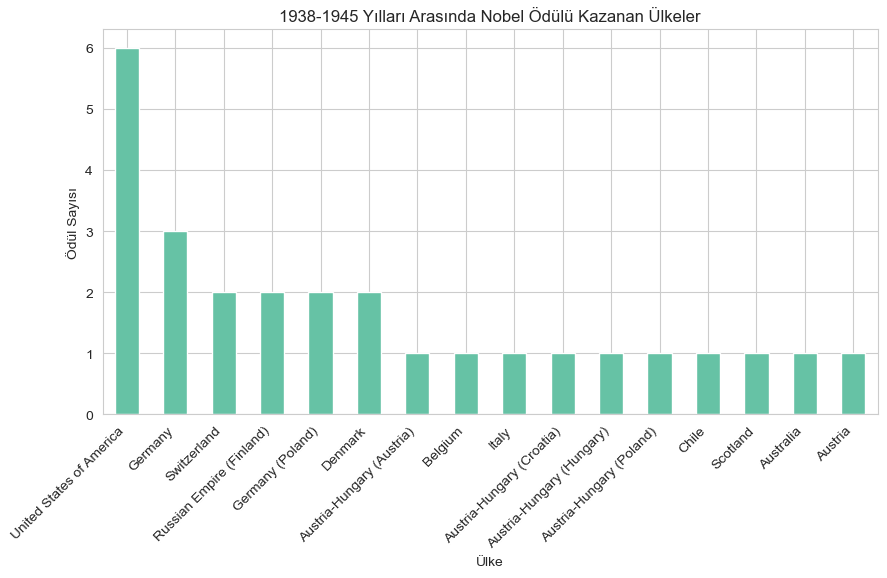

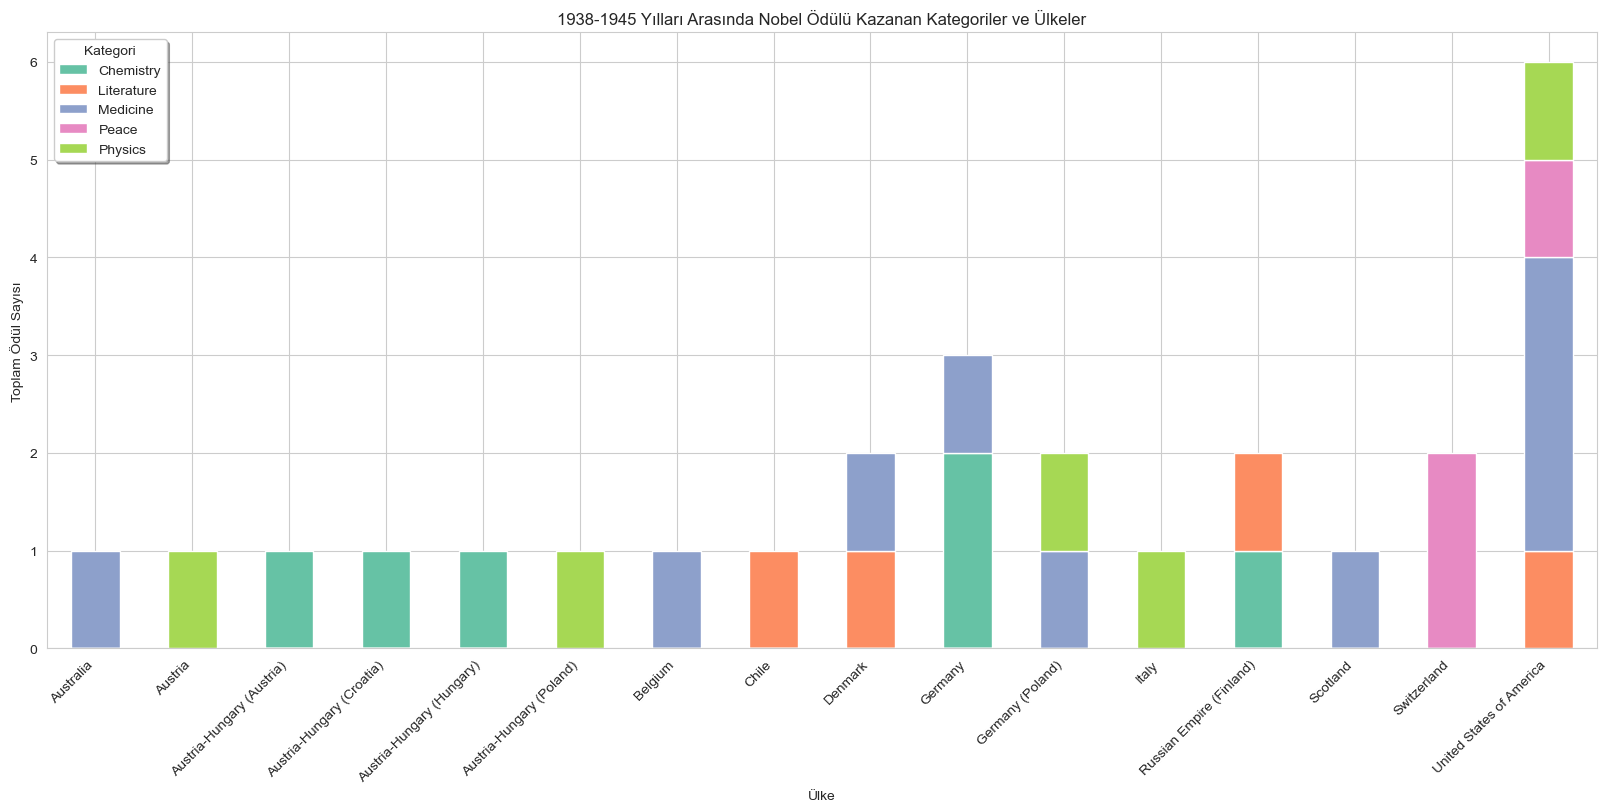

In [27]:
# 1938-1945 yılları arasındaki verileri filtrelemek
df_range = nobel[(nobel['year'] >= 1938) & (nobel['year'] <= 1945)]

# Ülkelere göre ödül sayılarını görşelleştirelim.
plt.figure(figsize=(10, 5))
df_range['birth_country'].value_counts().plot(kind='bar')
plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazanan Ülkeler')
plt.xlabel('Ülke')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=45,ha='right')
plt.show()

# Ülkelere ve kategorilere göre ödül sayısını hesaplayalım.
sum_df = df_range.groupby(['birth_country', 'category']).size().unstack(fill_value=0)

# grafik oluşturalım
sum_df.plot(kind='bar', stacked=True, figsize=(20, 8))

plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazanan Kategoriler ve Ülkeler')
plt.xlabel('Ülke')
plt.ylabel('Toplam Ödül Sayısı')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Kategori', bbox_to_anchor=(0, 1), loc='upper left', shadow=True)

plt.show()

## Yorum
1938-1945 yılı arasında İkinci Dünya Savaşı oldu. Buda çalışmaları etkilemiştir. ABD enfazla 6 nobel almış ve Medicine(Tıp) alanı önde geliyor savaştan dolayı olmuş olabilir. 2.Almanya 3 Nobel ödülüyle takip etmiştir.

Kategorik olarak baktığımızda bu yıllar arasında en fazla Medicine(Tıp) sonra Chemistry(Kimya) Nobel ödülü 

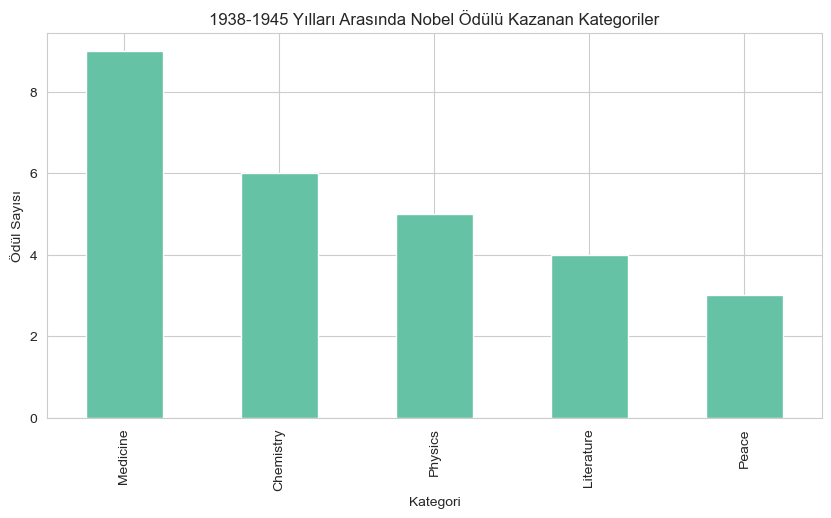

In [28]:
# Sadece kategorik olarak bakarsak
plt.figure(figsize=(10, 5))
df_range['category'].value_counts().plot(kind='bar')
plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazanan Kategoriler')
plt.xlabel('Kategori')
plt.ylabel('Ödül Sayısı')
plt.show()

## 7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)

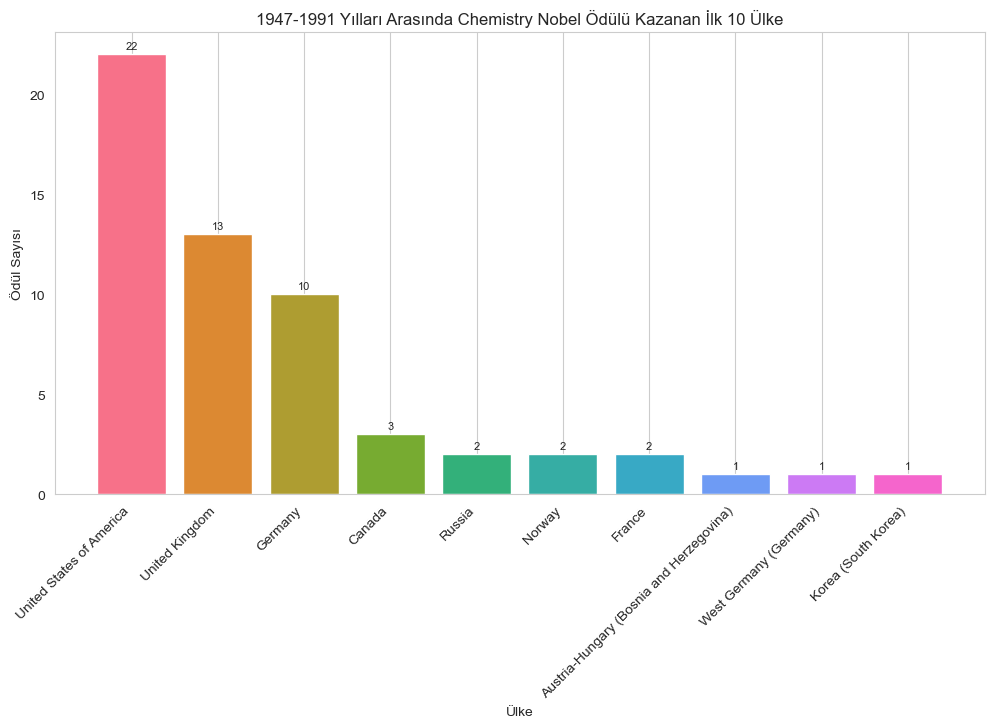

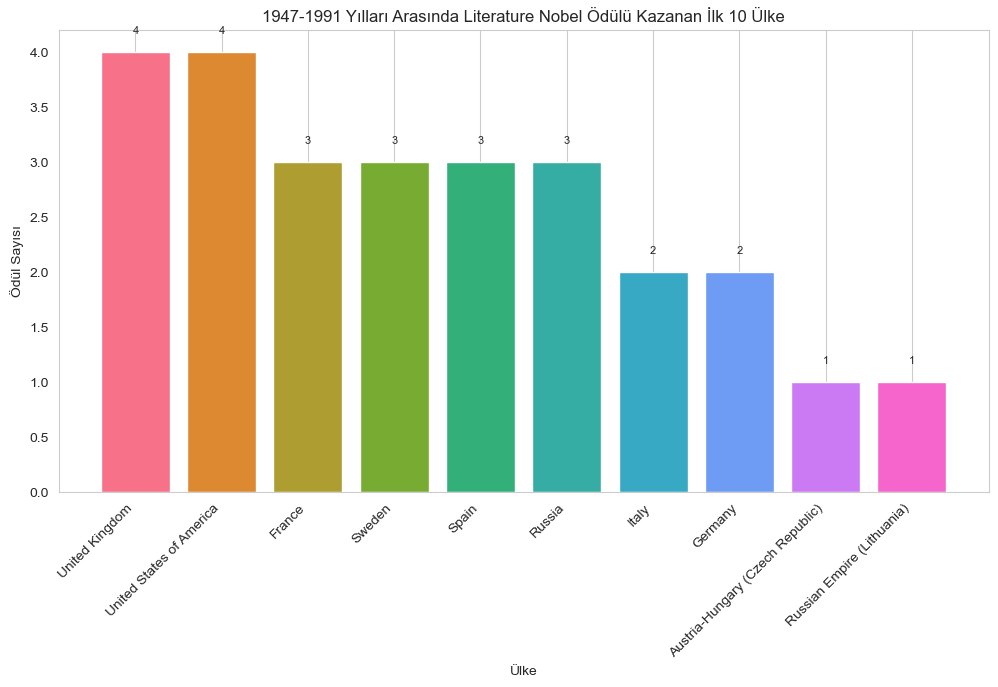

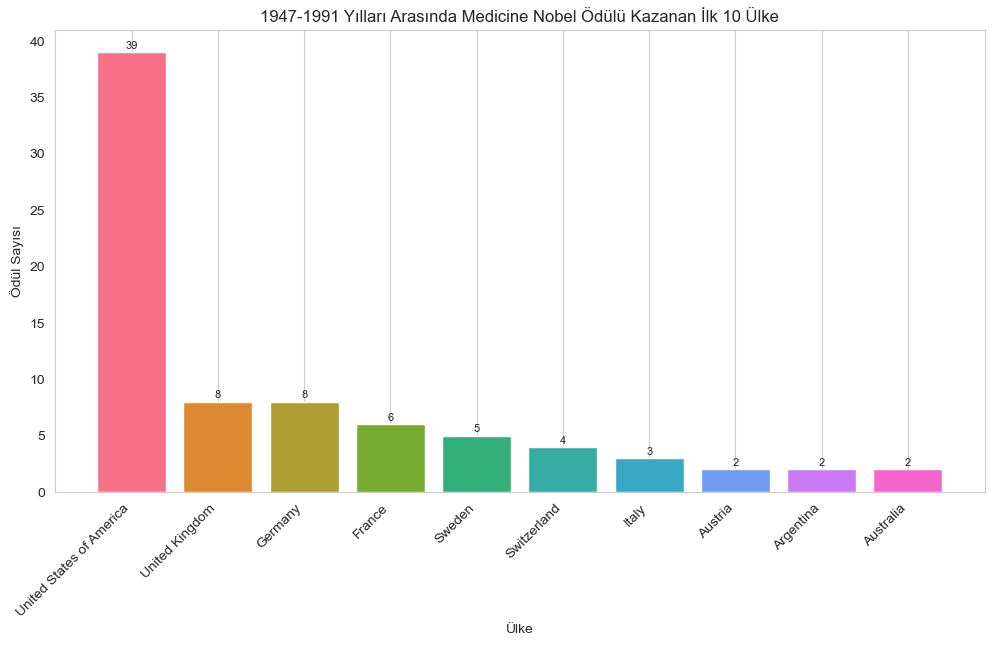

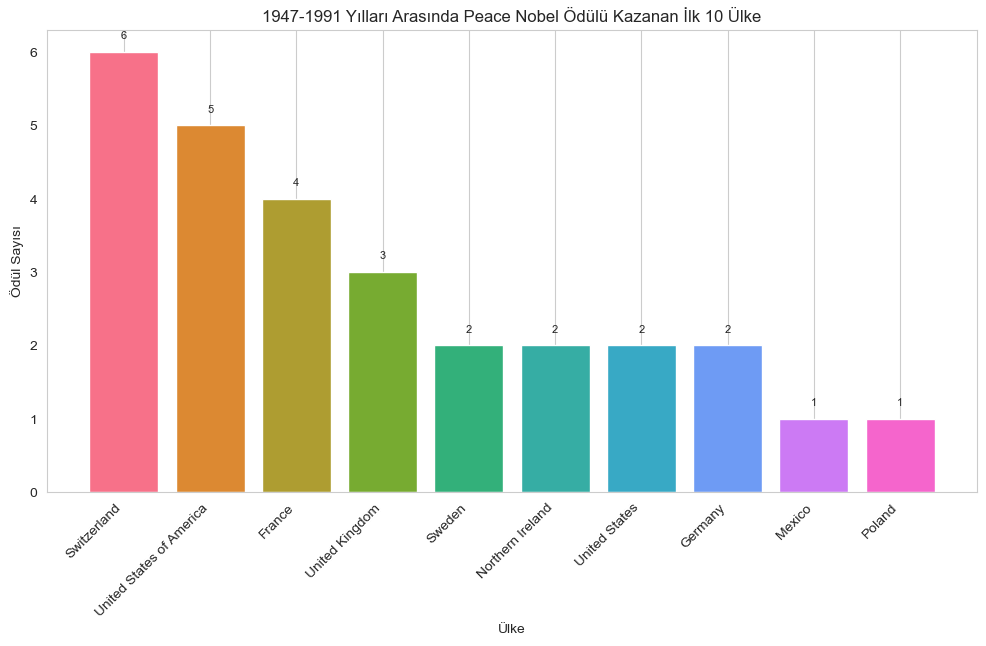

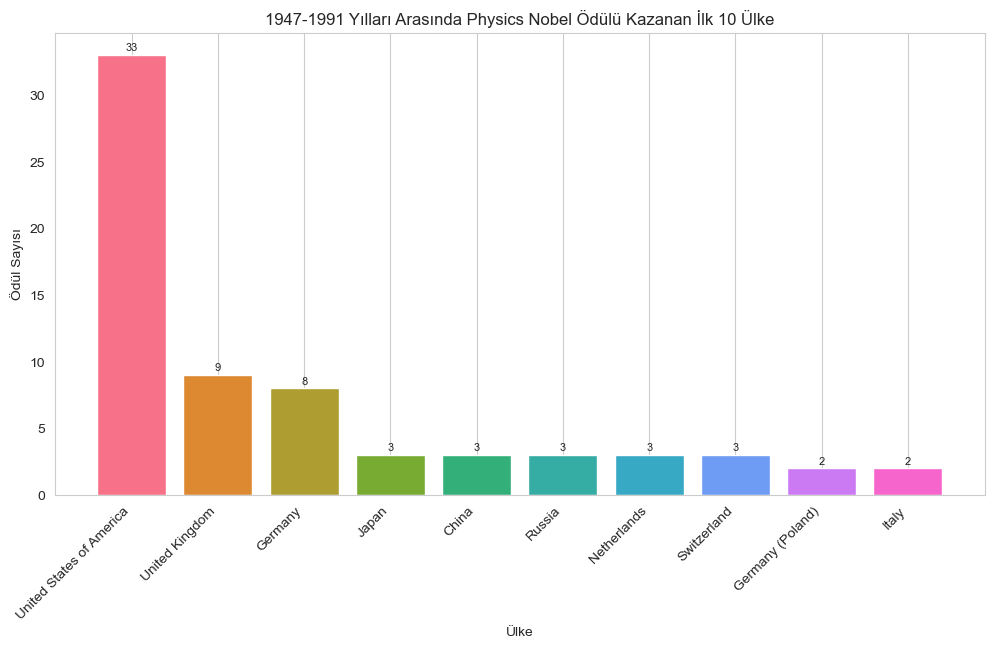

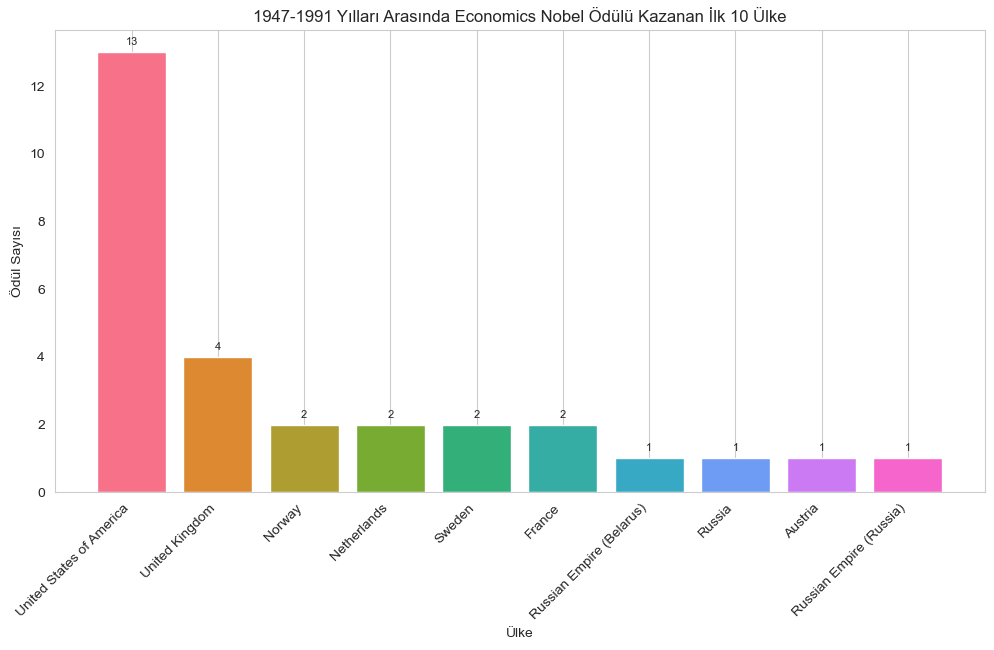

In [29]:
# Verileri belirlenen yıllar arasında filtreleme
range2_df = nobel[(nobel['year'] >= 1947) & (nobel['year'] <= 1991)]

# Her kategori için ayrı grafik çizmek
categories = range2_df['category'].unique()
for category in categories:
    # Belirli bir kategoriye ait verileri al
    category_df = range2_df[range2_df['category'] == category]
    
    # Ülke bazında ödül sayılarını hesapla ve ilk 10 ülkeyi al
    country_counts = category_df['birth_country'].value_counts().head(10)
    countries = country_counts.index.tolist()  # Ülkelerin isimleri
    counts = country_counts.tolist()  # Ödül sayıları
    
    # Seaborn renk paletlerinden birini kullanalım
    colors = sns.color_palette("husl", len(countries))
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(countries, counts, color=colors)
    
    # Her barın üzerine ödül sayısını yazdırma
    for bar, count in zip(bars, counts):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.15, count, ha='center', va='bottom', fontsize=8)
    
    # Grafik başlığı ve eksen isimleri
    plt.title(f'1947-1991 Yılları Arasında {category} Nobel Ödülü Kazanan İlk 10 Ülke')
    plt.xlabel('Ülke')
    plt.ylabel('Ödül Sayısı')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    
    plt.show()


## YORUM
1947-1991 yılları arasını araştırdığım zaman;
Soğuk savaş dönemi, nükleer bomba 1945 de atılmış ve uzay rekabetleri var ülkeler arasında ayrı ayrı değerlendirmek gerekiyor.
Fizik ve Kimya alanında Nobel ödüllerinin fazla olması; 1945 de atılan nükleer bombanın ülkeleri nükleer rekabete itmiş olması ve o dönemde süper güç olmak istiyen ülkelerin teknolojik ve askeri üstünlük arayışınından dolayı uzay yarışı adı verilen bir rekabet yaşanmış. Kategorik olarak değerlendirirsek de sıralama olarak Tıp - Fizik ve Kimya olarak devam ediyor.

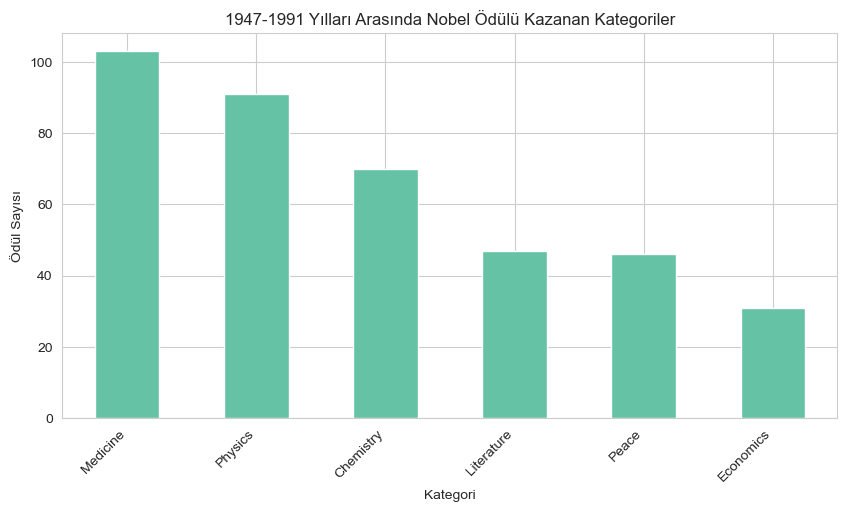

In [30]:
# Sadece kategorik olarak bakarsak
plt.figure(figsize=(10, 5))
range2_df['category'].value_counts().plot(kind='bar')
plt.title('1947-1991 Yılları Arasında Nobel Ödülü Kazanan Kategoriler')
plt.xlabel('Kategori')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=45, ha='right')
plt.show()

## 8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.

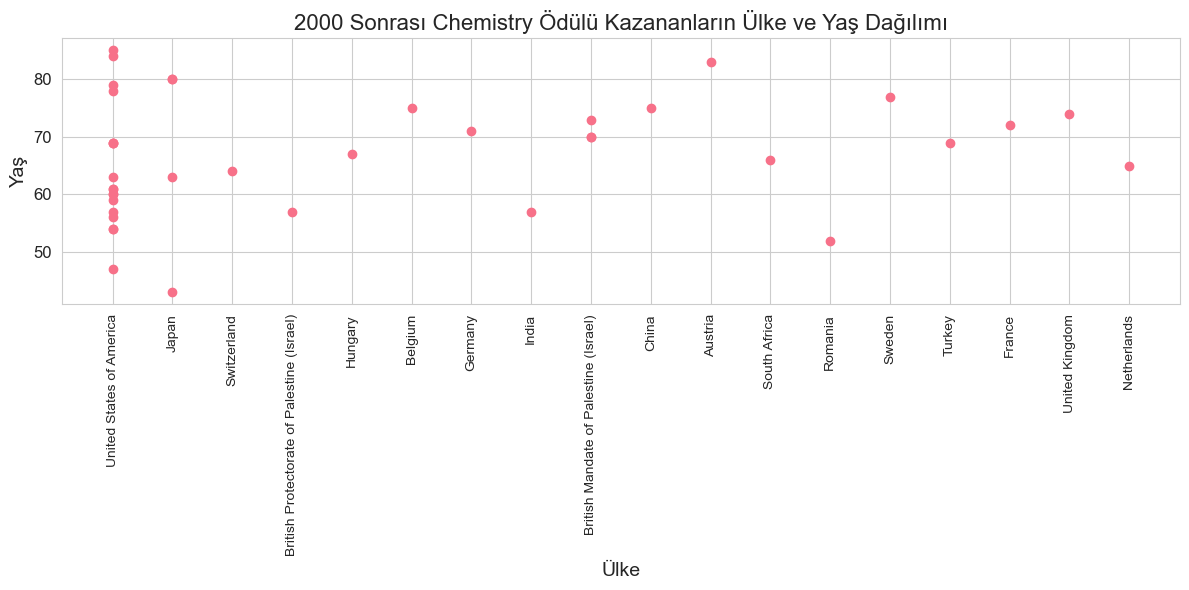

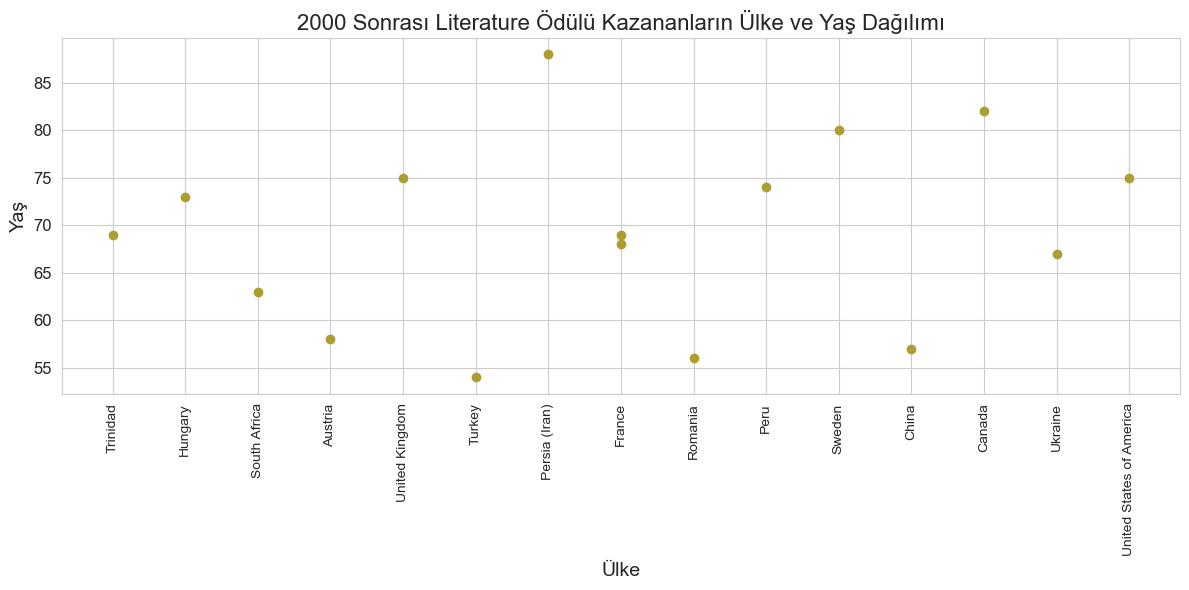

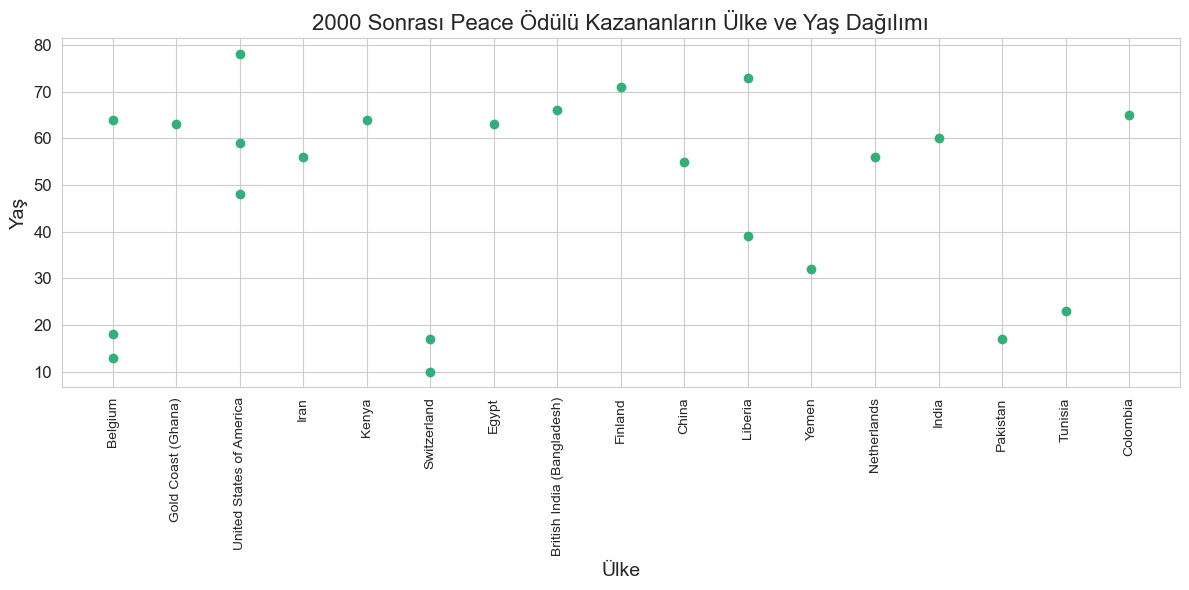

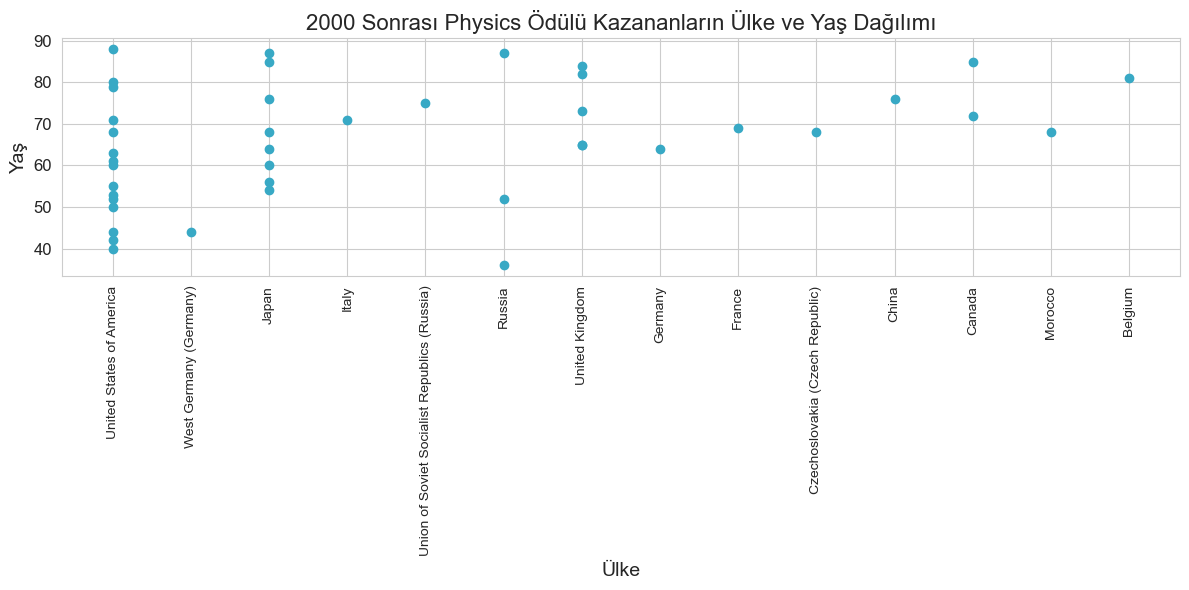

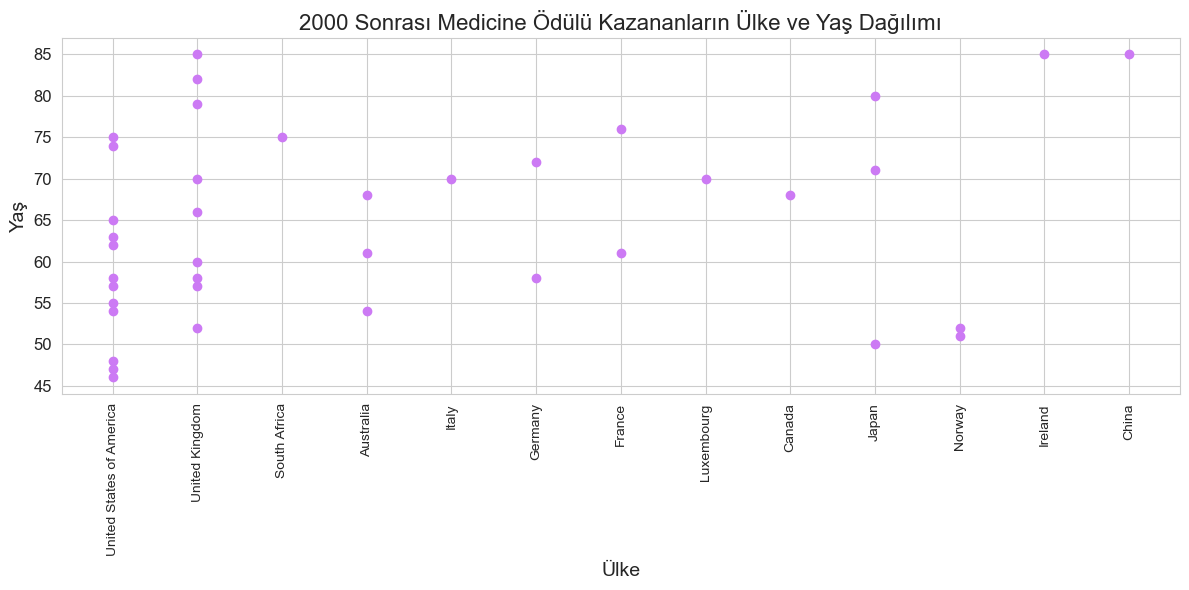

In [32]:
# 2000 yılından sonraki verileri filtrelemek
post_2000_df = nobel[nobel['year'] > 2000]

# İlgili kategoriler
categories_of_interest = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']

# Renk paleti
palette = sns.color_palette('husl', len(categories_of_interest))



for category in categories_of_interest:
    category_df = post_2000_df[post_2000_df['category'] == category]
    plt.figure(figsize=(12, 6))  # Grafik boyutu
    plt.scatter(category_df['birth_country'], category_df['age'], color=palette[categories_of_interest.index(category)])
    plt.title(f'2000 Sonrası {category} Ödülü Kazananların Ülke ve Yaş Dağılımı', fontsize=16)
    plt.xlabel('Ülke', fontsize=14)
    plt.ylabel('Yaş', fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## YORUM
    - 2000 sonrası Nobel Ödülleri çeşitli ülkelerden birçok kazanana gitmiştir, ancak ABD, Almanya, Japonya gibi bilim ve kültürde önde gelen ülkeler daha sık ödül kazanmıştır.
    - Çoğu kategori için, ödül kazananların yaşları genellikle 50-70 yaş aralığında yoğunlaşmaktadır, bu da Nobel Ödülleri'nin genellikle uzun ve başarılı kariyerlerin sonunda verildiğini gösterir.
    - Barış ödülü kazananların yaş dağılımı daha geniştir, bu da bu alanda genç aktivistlerin ve yaşlı liderlerin de ödül alabildiğini göstermektedir.